In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

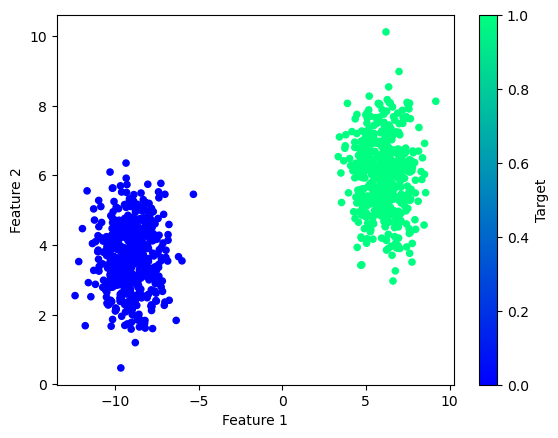

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.5675 - accuracy: 0.9693
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5546 - accuracy: 0.9920
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.9920
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.9920
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.9920
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.9920
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.9920
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.9920
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.9920
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.9920
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0850 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

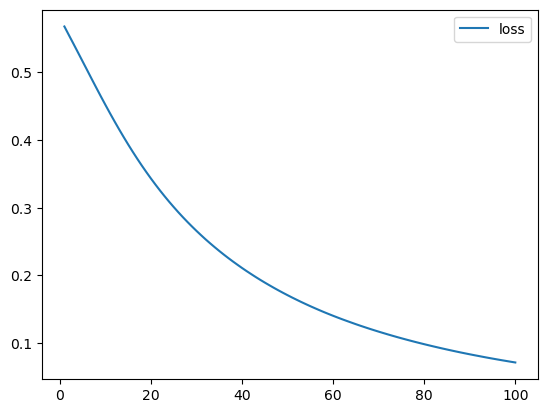

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

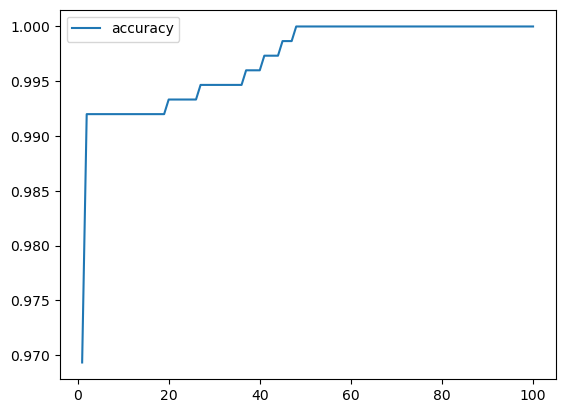

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0722 - accuracy: 1.0000 - 169ms/epoch - 21ms/step
Loss: 0.07217241078615189, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 116ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

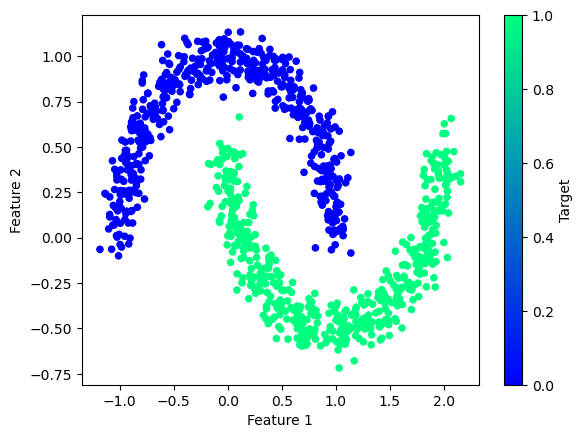

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2895 - accuracy: 0.4173
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1637 - accuracy: 0.4320
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0778 - accuracy: 0.4453
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0180 - accuracy: 0.4573
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9726 - accuracy: 0.4680
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9360 - accuracy: 0.4720
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9062 - accuracy: 0.4800
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8807 - accuracy: 0.4880
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8589 - accuracy: 0.4920
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8389 - accuracy: 0.4987
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7240
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7267
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7280
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7307
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7320
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7333
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7333
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7333
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7333
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7347
Epoch 93/100


<AxesSubplot:>

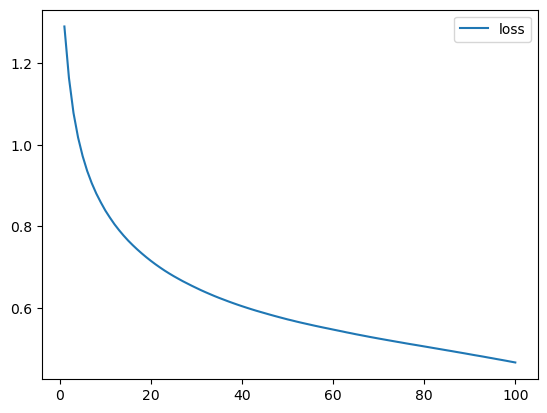

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

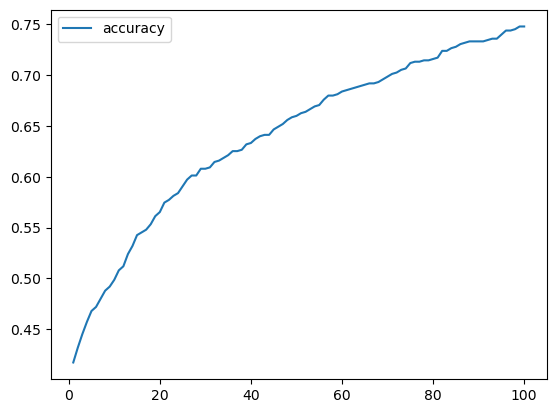

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6248 - accuracy: 0.6627
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.7973
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.8213
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 0.8253
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.8320
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8373
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.8387
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8493
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8533
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8587
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9120
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9133
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1944 - accuracy: 0.9133
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9133
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9147
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9147
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9147
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.9147
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9147
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1874 - accuracy: 0.9147
Epoch 93/100
